In [1]:
from transformers import GPT2LMHeadModel

/home/htkumar/local/miniconda3/envs/gpt-2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from datasets import load_dataset

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.is_bf16_supported()

True

In [ ]:
torch.tril(torch.ones(8, 8)).view(1, 1, 8, 8)

In [ ]:
x = torch.arange(12).view(2, 2, 3)
x.shape

In [ ]:
q, k, v = x.chunk(3, dim=2)
q.shape, k.shape, v.shape

In [ ]:
q, k, v = x.split(1, dim=2)
q.shape, k.shape, v.shape

In [ ]:
module_dict = nn.ModuleDict(
    dict(
        module_1=nn.Linear(10, 10),
        module_2=nn.Linear(10, 10),
    )
)

In [ ]:
module_dict.keys()

In [ ]:
q.shape

In [ ]:
q.shape[::-1]

In [ ]:
a = torch.arange(6).view(2, 3)
a.shape

In [ ]:
a.t().shape

In [ ]:
import tiktoken

In [ ]:
a = torch.arange(12).view(3, 4).double()
a.shape, a.dtype

In [ ]:
a = F.softmax(a, dim=1)
a

In [ ]:
topk_probs, topk_indices = torch.topk(a, 2, dim=1)

In [ ]:
topk_probs

In [ ]:
topk_indices

In [ ]:
b = torch.multinomial(topk_probs, 1)
b

In [ ]:
b.shape

In [ ]:
xcol = torch.gather(topk_indices, -1, b)
xcol

In [ ]:
t = torch.tensor([[1, 2], [3, 4]])
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

In [ ]:
torch.gather(t, 0, torch.tensor([[0, 0], [1, 0]]))

In [ ]:
a = torch.tensor(1)
a.shape

In [ ]:
a.item()

In [ ]:
a = torch.tensor([1, 2, 3])
len(a)

In [ ]:
import time

t0 = time.time()
t0

In [ ]:
t1 = time.time()

In [ ]:
(t1 - t0)

In [ ]:
time.time??

In [5]:
import math

In [6]:
max_lr = 6e-4
min_lr = max_lr * 0.1
warmup_steps = 10
max_steps = 50


def get_lr(it):
    # linear warmup
    if it < warmup_steps:
        return max_lr * (it + 1) / warmup_steps
    elif it > max_steps:
        return min_lr
    # cosine decay
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)

In [12]:
iters = list(range(100))

In [14]:
lrs = [get_lr(it) for it in iters]

In [17]:
import matplotlib.pyplot as plt


Bad key keymap.all_axes in file /mnt/xarfuse/uid-285367/b89978fe-seed-nspid4026531836_cgpid14017160-ns-4026531840/bento/server/matplotlibrc-3.1.3, line 76 ('keymap.all_axes : a                 # enable all axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [19]:
plt.style.use("_mpl-gallery")

findfont: Font family 'Noto Sans TC' not found.


findfont: Font family 'Noto Sans SC' not found.


findfont: Font family 'Noto Sans TC' not found.


findfont: Font family 'Noto Sans SC' not found.


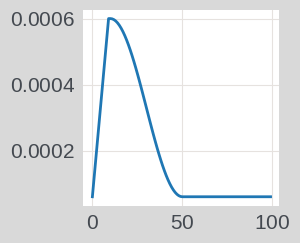

In [21]:
plt.plot(iters, lrs, linewidth=2.0)

In [1]:
import os

os.getcwd()

'/data/users/htkumar'

In [2]:
import sys

sys.path.append("/home/htkumar/llms/gpt2_karpathy")

In [3]:
from train_gpt2 import GPT, GPTConfig

model = GPT(GPTConfig(vocab_size=50304))

using device: cuda
loaded 338025 in dataloader, num_batches in 1 epoch is 20
num_decay_params: 124354560, num_nondecay_params: 121344, use_fused: True
loss at iter 0: 10.947336196899414, time_taken: 26886.01, tokens_per_sec: 609.39, norm: 28.5688| lr: 6.0000e-05
loss at iter 1: 9.502386093139648, time_taken: 102.37, tokens_per_sec: 160040.52, norm: 10.6576| lr: 1.2000e-04
loss at iter 2: 9.251543998718262, time_taken: 102.20, tokens_per_sec: 160308.57, norm: 7.3724| lr: 1.8000e-04
loss at iter 3: 9.762334823608398, time_taken: 102.43, tokens_per_sec: 159947.76, norm: 6.6542| lr: 2.4000e-04
loss at iter 4: 9.105025291442871, time_taken: 102.46, tokens_per_sec: 159908.68, norm: 4.2449| lr: 3.0000e-04
loss at iter 5: 8.795068740844727, time_taken: 102.47, tokens_per_sec: 159886.73, norm: 3.2619| lr: 3.6000e-04
loss at iter 6: 8.586079597473145, time_taken: 102.64, tokens_per_sec: 159620.08, norm: 2.3602| lr: 4.2000e-04
loss at iter 7: 8.265682220458984, time_taken: 102.58, tokens_per_sec:

In [4]:
optimizer = model.configure_optimizers(
    weight_decay=0.1, learning_rate=3e-4, device="cuda"
)

num_decay_params: 124354560, num_nondecay_params: 121344, use_fused: True


In [8]:
optimizer.param_groups[0].keys()

dict_keys(['params', 'weight_decay', 'lr', 'betas', 'eps', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'])

In [12]:
len(optimizer.param_groups[1]["params"])
# same as number of parameters in this group

98

In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, betas=(0.9, 0.95), eps=1e-9)

In [13]:
optimizer.param_groups[0]["lr"]

0.0003

In [14]:
import inspect

In [19]:
inspect.signature(torch.optim.AdamW).parameters

mappingproxy({'params': <Parameter "params: Union[Iterable[torch.Tensor], Iterable[Dict[str, Any]]]">,
              'lr': <Parameter "lr: Union[float, torch.Tensor] = 0.001">,
              'betas': <Parameter "betas: Tuple[float, float] = (0.9, 0.999)">,
              'eps': <Parameter "eps: float = 1e-08">,
              'weight_decay': <Parameter "weight_decay: float = 0.01">,
              'amsgrad': <Parameter "amsgrad: bool = False">,
              'maximize': <Parameter "maximize: bool = False">,
              'foreach': <Parameter "foreach: Optional[bool] = None">,
              'capturable': <Parameter "capturable: bool = False">,
              'differentiable': <Parameter "differentiable: bool = False">,
              'fused': <Parameter "fused: Optional[bool] = None">})

In [26]:
params_dict = {pn: p for pn, p in model.named_parameters()}
params_dict["transformer.wte.weight"].requires_grad
len(params_dict)

148

In [27]:
params_dict = {pn: p for pn, p in params_dict.items() if p.requires_grad}
len(params_dict)

148

In [35]:
decay_params = [p for n, p in params_dict.items() if p.dim() >= 2]
nondecay_params = [p for n, p in params_dict.items() if p.dim() < 2]
len(decay_params), len(nondecay_params)

(50, 98)

In [40]:
num_decay_params = sum(p.numel() for p in decay_params)
num_nondecay_params = sum(p.numel() for p in nondecay_params)

In [41]:
print(num_decay_params, num_nondecay_params)

124354560 121344


In [1]:
# fineweb edu dataset processing

In [2]:
import multiprocessing as mp
import os

import numpy as np
import tiktoken
from datasets import load_dataset
from tqdm import tqdm

/home/htkumar/local/miniconda3/envs/gpt-2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
remote_name = "sample-10BT"  # these are 10B gpt2 tokens sampled from the whole dataset

In [5]:
# fw = load_dataset("HuggingFaceFW/fineweb-edu", name=remote_name, split="train")

In [9]:
max_value = np.iinfo(np.uint16).max
max_value

65535

In [10]:
np.iinfo(np.uint16).min

0

In [12]:
a = np.array([2**16 - 1])
a.astype(np.uint16)

array([65535], dtype=uint16)

In [1]:
os.path.join(os.path.dirname(__file__), "test")

NameError: name '__file__' is not defined

In [2]:
os.cpu_count() // 2

48

In [5]:
loss = torch.tensor(3.1)

In [6]:
loss.detach()

tensor(3.1000)